# Nota de Estudo — Movimento Longitudinal da Motocicleta (Solução de Equação Diferencial Ordinária)

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 04/10/2025  
> **Primeira publicação:** 08/10/2025  
> **Versão Atual:** v-2025-10-08-a (fase de teste técnico no Colab; uso pedagógico com estudantes e início da revisão final de código/texto)

---

Neste notebook, iremos modelar matematicamente o modelo da moto andando para frente. 
Para tanto, iremos incluir as forças principais (*i.e.*, inércia, propulsão, frenagem, arrasto, rolagem e rampa) para prever o 
comportamento da moto. Depois do modelo básico, estudaremos como alguns parâmetros com motor influenciam seu comportamento, 
o papel das marchas, uma comparação com as motos elétricas e o efeito do piloto no controle da moto.

## Objetivo

- Formular e integrar a EDO do movimento longitudinal, partindo do balanço de forças.  
- Substituir a hipótese de potência constante por um **modelo de potência variável**:  
  - ICE: $P_{motor}=\eta_m\,\eta_{vol}\,\omega\,T_{ref}$ e seleção de marchas.  
  - EV: torque constante até $\omega_{base}$ e potência aproximadamente constante até $\omega_{max}$.  
- Ligar a velocidade linear $V$ à rotação $\omega$ via **relação de transmissão total** $i_{tot}$.  
- Comparar $P(V)$ e $V(t)$ para ICE (5 marchas) e EV (mono-redução).

## Referência

- Magnani, Fábio. “Física Básica das Motos”, 2020a.  
- Magnani, Fábio. “Solução Computacional do Movimento das Motos”, 2020b.  
- Magnani, Fábio. “O Motor da Moto”, 2020c.

## Estrutura

1) Modelo básico e EDO do movimento.  
2) Potência variável (ICE) e vínculo $\,\omega=i_{tot}\,V/R_{rod}\,$.  
3) Seleção de marchas e construção do mapa $P(V)$.  
4) Modelo elétrico e sua curva $P(\omega)$.  
5) Comparações e análises.  

## Notação básica

- Cinemática/forças:  
  - $t$ [s], $x$ [m], $V$ [m/s], $m$ [kg], $g$ [m/s^2], $\theta$ [rad].  
  - $\rho$ [kg/m^3], $C_D$ [–], $A_f$ [m^2] (arrasto), $C_R$ [–] (rolagem).  
- Potência/rotação:  
  - $\omega$ [rad/s], $R_{rod}$ [m], $i_{tot}=i_{primary}\,i_{final}\,i_g$.  
  - ICE: $\eta_m$ [–], $\eta_{vol}$ [–], $T_{ref}$ [N·m], $P_{motor}$ [W], $\omega_{red}$.  
  - EV: $\eta_{ev}$ [–], $\tau$ [N·m], $\omega_{base}$, $\omega_{max}$, $P_{lim}$ [W].  
- Controle: $\,\alpha\in[0,1]$ (uso do motor), $\,\beta\in[0,1]$ (frenagem).


## Simulação Dinâmica de Motocicleta

A Fig.1 mostra as forças atuando em uma motocicleta, sendo a propulsão à frente, e a frenagem, a resistência aerodinâmica, a resistência à rolagem e a ação da gravidade (no caso de subidas) resistindo ao movimento. 


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-moto-longitudinal-fig-01.png" alt="Balanço de forças na motocicleta" width="600" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Balanço de forças na motocicleta.</figcaption>
</figure>   


Se fizermos o balanço de forças na direção do movimento ($x$), e aplicarmos a 2ª Lei de Newton:

$$
   F = ma   \tag{1}
$$

Chegamos à:

$$
   ma = F_{\text{prop}} - F_{\text{fren}} - F_{\text{aer}} - F_{\text{rol}} - F_{\text{grav,x}}    \tag{2}
$$

Calculando separadamente cada força (Magnani, 2020a; 2020b), e lembrando que $a=dV/dt$, finalmente chegamos à EDO (equação diferencial ordinária) que rege o fenômeno de movimento longitudinal da motocicleta

$$
\boxed{
\frac{\mathrm{d}V}{\mathrm{d}t}
= \alpha \frac{ P_{\max}}{m\,V}
- \beta\,\mu\, g \cos\theta
- \frac{\rho\, C_{D}\, A_{f}}{m}\,\frac{V^{2}}{2}
- C_{R}\, g \cos\theta
- g \sin\theta
}
\tag{3}
$$

$$
\begin{aligned}
\\ \\ \\ onde: & \\
\\
t \quad &\text{: tempo, em s} \\
x \quad &\text{: posição, em m} \\
V \quad &\text{: velocidade, em m/s} \\
m \quad &\text{: massa do conjunto motocicleta/piloto, em kg} \\
P_{\text{max}} \quad &\text{: potência máxima do motor, em W} \\
\mu \quad &\text{: coeficiente de atrito entre a pista e o pneu} \\
\theta \quad &\text{: inclinação da pista, em rad} \\
\rho \quad &\text{: massa específica do ar, em kg/m³} \\
A_f \quad &\text{: área frontal do conjunto motocicleta/piloto, em m²} \\
C_R \quad &\text{: coeficiente de resistência à rolagem} \\
C_D \quad &\text{: coeficiente de arrasto aerodinâmico} \\
\alpha \quad &\text{: percentual do uso do motor, no intervalo [0–1]} \\
\beta \quad &\text{: percentual do uso da força de atrito disponível, no intervalo [0–1]} \\
\end{aligned}
$$




### Análise dos Parâmetros Principais da Equação de Movimento

A equação (3) expressa o balanço dinâmico entre a propulsão, as resistências e a gravidade no movimento longitudinal da motocicleta. Cada termo representa um fenômeno físico distinto, e seus parâmetros influenciam diretamente a aceleração resultante.

| Parâmetro | Papel físico | Efeito no movimento |
|---|---|---|
| **α** (fração de uso da potência) | Representa o quanto do potencial do motor está sendo efetivamente utilizado. | Quanto maior α (próximo de 1), maior a aceleração disponível; valores baixos indicam aceleração parcial ou cruzeiro. |
| **β** (fração da força de atrito utilizada na frenagem) | Mede a intensidade da frenagem em relação à aderência máxima. | Aumentar β intensifica a desaceleração até o limite de travamento dos pneus (limitado por μ). |
| **m** (massa total) | Soma das massas da motocicleta e do piloto. | Entra no denominador da propulsão e do arrasto por unidade de massa: quanto maior m, menor a aceleração em arrancadas e menor a sensibilidade relativa ao arrasto. |
| **V** (velocidade instantânea) | Afeta o termo de potência (via 1/V) e o arrasto aerodinâmico (via V²). | Aumentar V reduz o ganho da propulsão e amplifica as perdas aerodinâmicas; em altas velocidades, a aceleração tende a zero (velocidade terminal). |
| **θ** (inclinação da pista) | Controla as componentes gravitacionais e a normal (via cos θ). | Em subidas (θ>0) o termo −g sin θ reduz a velocidade; em descidas (θ<0) torna-se propulsor. Modula também frenagem e rolagem via cos θ. |
| **ρ, C_D, A_f** (densidade do ar, coeficiente e área frontal) | Descrevem o arrasto aerodinâmico. | Pequenas variações alteram fortemente o desempenho em altas velocidades, pois o termo cresce com V². |
| **C_R** (resistência à rolagem) | Modela perdas mecânicas associadas à deformação do pneu e da suspensão. | Efeito praticamente constante (neste modelo simples); mais relevante em baixas velocidades e pisos irregulares/pressão inadequada. |
| **μ** (coeficiente de atrito pneu/pista) | Determina a capacidade máxima de frenagem (com β). | Quanto maior μ, maior a força de frenagem disponível antes do deslizamento. |

**Em resumo:** a aceleração instantânea depende fortemente de **α** (propulsão) e **V** (regime dinâmico), sendo amortecida por **m**, aerodinâmica (**ρ C_D A_f**) e gravidade (**θ**). A formulação permite simular **aceleração** e **frenagem** ajustando apenas **α** e **β** conforme o regime de condução.



# Parâmetros Físicos do Modelo Matemático - Caso Base

Vamos agora simular o caso específico de uma motocicleta. Primeiro vamos usar o caso base, depois vamos variar os parâmetros para estudar a sua influência. Segue uma tabela com valores adotados, faixas típicas e justificativas breves.

| Símbolo | Valor | Unidade | Faixa típica / Observação | Comentário sobre a escolha |
|---|---:|---|---|---|
| $α$  | 1.0 | – | 0–1 | Uso pleno do motor para o caso-base. Permite varrer cenários com 0≤α≤1. |
| $P_{\text{max}}$ | 22080 | W | 10–75 kW (motos 150–650 cc) | ≈22 kW (~30 hp): moto média/leve. |
| $m$ | 250 | kg | 180–300 kg (moto+piloto+carga) | Combinação conservadora para moto de rua com piloto e combustível. |
| $β$  | 0 | – | 0–1 | Sem frenagem no trecho de aceleração (caso-base). |
| $μ$ | 0.8 | – | 0.6–1.0 (asfalto seco) | Aderência alta porém realista em pista seca. |
| $g$ | 9.81 | m/s² | 9.79–9.83 | Padrão SI. |
| $θ$  | 0 | rad | −0.15 a 0.15 rad (±8.6°) | Trecho plano como referência. |
| $ρ$ | 1.225 | kg/m³ | 1.1–1.3 (nível do mar, 0–30 °C) | Atmosfera padrão ao nível do mar. |
| $C_D$ | 0.7 | – | 0.6–0.9 (piloto ereto e moto não carenada) | Valor médio. |
| $A_f$ | 0.7 | m² | 0.6–0.8 | Área frontal típica de moto com piloto sentado. |
| $C_R$ | 0.02 | – | 0.01–0.03 | Resistência à rolagem para pneus de moto em asfalto. | 
| $V_{0}$ | 0.01 | m/s | 0.01–0.5 | Pequeno “ε” para evitar singularidade em $P_{\text{max}}/(m·V)$. Equivale a partir quase parado. |
| $t_{0}$ | 0 | s | – | Início da simulação. |
| $t_f$ | 30 | s | 10–60 | Janela suficiente para atingir regime de velocidade em trecho plano. |

    
### Solução da EDO (equação diferencial ordinária) de $V(t)$

Vamos resolver numericamente essa equação, usando os seguintes parâmetros:

| Símbolo | Valor | Unidade | Faixa típica / Observação | Comentário sobre a escolha |
|---|---:|---|---|---|
| $V_{0}$ | 0.01 | m/s | 0.01–0.5 | Pequeno “ε” para evitar singularidade em $P_{\text{max}}/(m·V)$. Equivale a partir quase parado. |
| $t_{0}$ | 0 | s | – | Início da simulação. |
| $t_f$ | 30 | s | 10–60 | Janela suficiente para atingir regime de velocidade em trecho plano. |

Em resumo, vamos resolver a equação:   
  $$ \dfrac{dV}{dt} = \alpha \dfrac{P_{\max}}{m\,V} \;-\; \beta\,\mu\,g\cos\theta \;-\; \dfrac{\rho\,C_D\,A_f}{2m}\,V^2 \;-\; C_R\,g\cos\theta \;-\; g\sin\theta $$

A moto partirá do "repouso". Na verdade, vamos usar uma pequena velocidade inicial $V_0=0{,}01$ m/s para evitar a singularidade do termo $P_{\max}/mV$.

Resolveremos a EDO no intervalo $t=[0, 30s]$, usando o método de Runge-Kutta, implementado por  `scipy.integrate.solve_ivp` (RK45, passo adaptativo) com a função `dVdt(t,V)` acima.

Para visualização, usaremos `t_eval` com 500 pontos uniformes. Mas isso só vale para produzir os pontos que serão plotados no gráfico; isso não altera os passos internos do integrador.

Finalmente, todas as equações e dados estão no SI. Só iremos converter na etapa de plotagem.


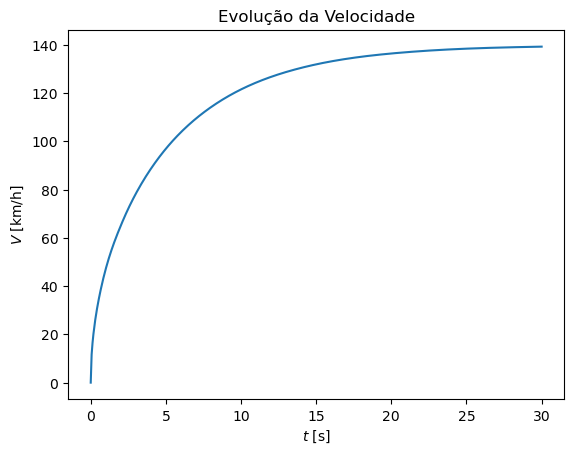

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parâmetros
alpha = 1.0
P_max = 22080
m = 250
beta = 0
mu = 0.8
g = 9.81
theta = 0
rho = 1.225
C_D = 0.7
A_f = 0.8
C_R = 0.02
V0 = 0.01
t0 = 0
tf = 30

# Equação diferencial
def dVdt(t, V):
    return alpha*P_max/(m*V) - beta*mu*g* np.cos(theta) - rho*C_D*A_f/m/2* V**2 - C_R*g*np.cos(theta) - g*np.sin(theta)

# Solver EDO
sol = solve_ivp(dVdt, (t0, tf), [V0], t_eval=np.linspace(t0, tf, 500))

# Plotar
plt.plot(sol.t, sol.y[0] * 3.6)  # Conversão de m/s para km/h 
plt.xlabel('$t$ [s]')
plt.ylabel('$V$ [km/h]')
plt.title('Evolução da Velocidade')
plt.show()


## Análise do Modelo e Exploração

O gráfico acima mostra a evolução da velocidade de uma motocicleta ao longo do tempo, considerando os parâmetros padrão definidos no início do notebook. Com a potência máxima do motor ajustada para **22080 W** (~30 CV, uma moto comum de 300cc), observa-se que a motocicleta acelera rapidamente nos primeiros segundos e se aproxima de uma **velocidade de equilíbrio** próxima de 140 km/h.

Esse comportamento é consistente com o modelo físico: a aceleração é inicialmente alta, pois a força de propulsão é dominante. Com o aumento da velocidade, a força de propulsão (~$P/V$) diminui  e a força do arrasto aerodinâmico ($~V^2$) aumenta.

---

## Explorando diferentes cenários

Na célula abaixo, podemos alterar o valor de qualquer dos parâmetros do modelo (como a potência do motor, a massa da motocicleta, o coeficiente de arrasto, etc.) e observar como isso afeta a dinâmica do sistema.

Para isso, por exemplo:

1. Altere o valor da variável `P_max` logo no início da célula (exemplo, P_max=13000);
2. Depois, modifique o texto da legenda (`legenda_mod`), para que o texto correto apareça no gráfico;

Depois, a a equação diferencial será resolvida mais uma vez, mas agora com o novo parâmetro. Finalmente, o novo gráfico será desenhado **junto com a curva base anterior**, permitindo uma comparação visual imediata.

Passe bastante tempo nesta etapa. Afinal, nosso objetivo não é criar um modelo matemático, mas sim usar o modelo matemático para aprender como é o fenômeno físico.


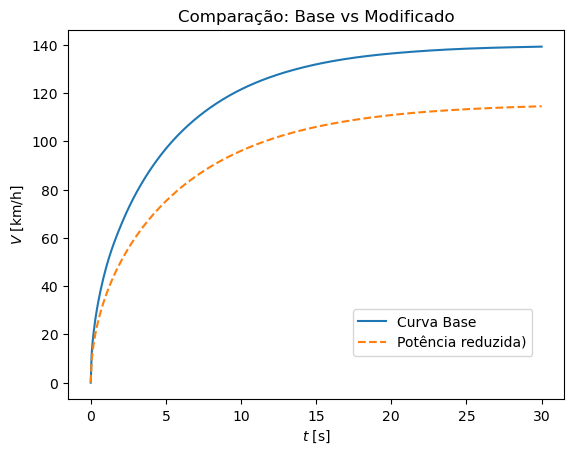

In [2]:
# ATENÇÃO: certifique-se de ter rodado a célula anterior antes desta, pois os parâmetros da motocicleta estão lá
# Variação do parâmetro
P_max = 13000  # Parâmetro variado
legenda_mod = f'Potência reduzida)'  # legenda associada

# A EDO é resolvida novamente, com o novo valor para o parâmetro
sol_mod = solve_ivp(dVdt, (t0, tf), [V0], t_eval=np.linspace(t0, tf, 500))

# Plot comparativo
plt.plot(sol.t, sol.y[0]*3.6, label='Curva Base')
plt.plot(sol_mod.t, sol_mod.y[0]*3.6, '--', label=legenda_mod)
plt.xlabel('$t$ [s]')
plt.ylabel('$V$ [km/h]')
plt.title('Comparação: Base vs Modificado')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.10)) # Posição da legenda
plt.show()


## Potência do Motor

Vamos agora incluir algumas complexidades no modelo. Uma grande aproximação do nosso modelo básico (Eq.3) foi que usamos uma potência máxima constante para o motor. Sabemos que isso não é verdade. Em geral, a potência do motor varia com a sua rotação. Para maiores detalhes, vá em Magnani (2020c) para compreender melhor as equações abaixo. Nosso objetivo aqui não é deduzir novamente, mas apenas compreender o efeito da variação da potência do motor com a rotação no movimento da motocicleta.

$$
  P_{motor} = \eta_m\,P_{comb} = \eta_m\,\eta_{vol}\,\omega\,T_{ref} \tag{4}
$$


Onde:

$$
\begin{aligned}
T_{ref} & = \dfrac{1}{4\pi}\,V_{desl}\!\left(\dfrac{p_{a}}{R\,T_a}\right)
\dfrac{\sigma\,PC_{comb}\,M_{comb}}{\sigma+\lambda\,\gamma} \\[6pt]
\gamma & = x+\dfrac{y}{4}-\dfrac{z}{2} \\[6pt]
M_{comb} & = x\,M_C + y\,M_H + z\,M_O
\end{aligned}
$$




### Parâmetros do modelo de potência (valores usados na simulação)

As tabelas a seguir reúnem os **valores numéricos** que serão empregados no código apresentado.  
Os parâmetros estão organizados em três grupos: **atmosfera**, **motor** e **combustível**.

---

#### **1. Parâmetros atmosféricos**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $p_a$ | Pressão absoluta do ar | 101 325 | Pa | 1 atm | Condição padrão ao nível do mar |
| $T_a$ | Temperatura do ar | 293.15 | K | 20 °C | Condição ambiente média |
| $R$ | Constante universal dos gases | 8.314 × 10⁰ | J/(mol·K) | – | Valor universal |
| $\sigma$ | Fração molar de O₂ no ar | 0.21 | – | 21 % | Atmosfera padrão |
| $\lambda$ | Fator de excesso de ar (razão ar/comb. real ÷ teórica) | 1.0 | – | – | Mistura estequiométrica |

---

#### **2. Parâmetros do motor**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $V_{desl}$ | Volume deslocado total (cilindrada) | 3.00 × 10⁻⁴ | m³ | 300 cm³ | Moto de média cilindrada |
| $\eta_{vol}$ | Eficiência volumétrica | 0.90 | – | 90 % | Moto aspirada em regime médio |
| $\eta_m$ | Rendimento mecânico global | 0.30 | – | 30 % | Inclui perdas mecânicas e térmicas |
| $\omega_{red}$ | Rotação limite (redline) | 995 rad/s | rad/s | 9 500 rpm | A partir daqui a potência é anulada no modelo |
| $P_{motor}$ | Potência do motor (saída efetiva) | *calculada* | W | kW ou hp | Via equação $P=\eta_m \eta_{vol} \omega T_{ref}$ |

---

#### **3. Parâmetros do combustível (gasolina ≈ C₈H₁₈)**

| Símbolo | Nome / Significado | Valor | Unidade (SI) | Unidade usual | Observação |
|:---:|:---|---:|---|---|---|
| $x, y, z$ | Coeficientes estequiométricos (CₓH_yO_z) | 8, 18, 0 | – | – | Combustível genérico tipo gasolina |
| $M_C$ | Massa molar do carbono | 12.011 × 10⁻³ | kg/mol | 12.011 g/mol | – |
| $M_H$ | Massa molar do hidrogênio | 1.008 × 10⁻³ | kg/mol | 1.008 g/mol | – |
| $M_O$ | Massa molar do oxigênio | 15.999 × 10⁻³ | kg/mol | 15.999 g/mol | – |
| $M_{comb}$ | Massa molar da molécula de combustível | 0.11423 | kg/mol | 114.23 g/mol | Para C₈H₁₈ |
| $PC_{comb}$ | Poder calorífico inferior | 44.8 × 10⁶ | J/kg | 44.8 MJ/kg | Gasolina comercial |
| $\gamma$ | Termo auxiliar ($x + y/4 - z/2$) | 12.5 | – | – | Determina a proporção teórica de O₂ |

---

### **Síntese do modelo**

A potência instantânea é calculada por:

$$
P_{motor} = \eta_m \, \eta_{vol} \, \omega \, T_{ref}
$$

com

$$
T_{ref} = \frac{1}{4\pi} \, V_{desl}\!\left(\frac{p_a}{R\,T_a}\right)
\frac{\sigma\,PC_{comb}\,M_{comb}}{\sigma+\lambda\,\gamma}
$$
e o corte de rotação implementado como:

$$
P_{motor}(\omega) =
\begin{cases}
\eta_m \, \eta_{vol} \, \omega \, T_{ref}, & \omega < \omega_{red}\\[4pt]
0, & \omega \ge \omega_{red}
\end{cases}
$$

Esses valores produzem potências típicas na faixa de **10–25 kW (≈ 15–34 hp)** entre 3 000 e 9 000 rpm, compatíveis com motocicletas de 300 cm³.


 3000 rpm  ->    7.12 kW  (~  9.55 hp)
 6000 rpm  ->   14.24 kW  (~ 19.09 hp)
 9000 rpm  ->   21.35 kW  (~ 28.64 hp)
11000 rpm  ->    0.00 kW  (~  0.00 hp)


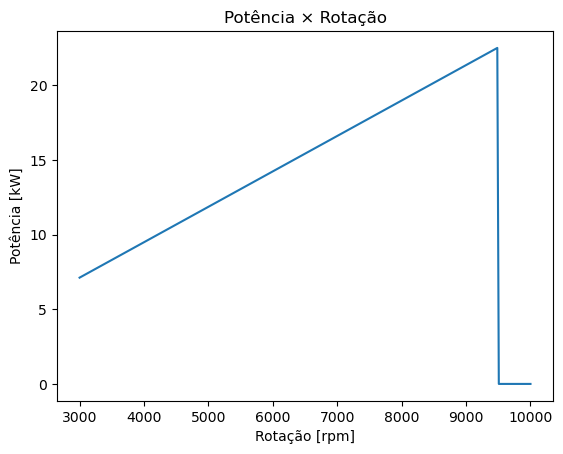

In [12]:
# 1) Parâmetros
import numpy as np
import matplotlib.pyplot as plt

# Ambiente / motor
V_desl = 300e-6          # m³  (ex.: 300 cm³)
p_a  = 101325.0        # Pa
T_a    = 293.15          # K
eta_vol = 0.90           # eficiência volumétrica (média)
eta_m   = 0.30           # rendimento do motor
sigma   = 0.21           # fração molar de O2 no ar
lam     = 1.0            # fator de ar (estequiométrico)
R       = 8.314462618    # J/mol/K

# Combustível aproximado: C_x H_y O_z (gasolina ~ C8H18)
x, y, z = 8, 18, 0
PC_comb = 44.8e6                                 # J/kg (LHV típico)
M_C, M_H, M_O = 12.011e-3, 1.008e-3, 15.999e-3   # kg/mol
M_comb = x*M_C + y*M_H + z*M_O                   # kg/mol

# Redline (a partir do qual a potência zera)
rpm_redline = 9500.0
w_redline   = rpm_redline * 2*np.pi/60  # rad/s

# 2) Função de potência P(ω) com corte no redline
def pmotor(omega):
    # Eq. base: P_motor = eta_m * eta_vol * omega * T_ref
    gamma = x + y/4 - z/2
    T_ref = (1/(4*np.pi)) * V_desl * (p_a/(R*T_a)) * (sigma*PC_comb*M_comb)/(sigma + lam*gamma)
    w = np.asarray(omega, dtype=float)
    w_eff = np.where(w < w_redline, w, 0.0)   # zera potência após o redline
    return eta_m * eta_vol * w_eff * T_ref    # W

# 3) Uso da função para o caso base
rpm   = np.array([3000, 6000, 9000, 11000])   # inclui um ponto acima do redline
omega = rpm * 2*np.pi/60
P     = pmotor(omega)

for r, p in zip(rpm, P):
    print(f"{r:>5.0f} rpm  ->  {p/1000:6.2f} kW  (~{p/745.7:6.2f} hp)")

# Curva de rotação (usa pmotor e parâmetros já definidos)
rpm = np.linspace(3000, 10000, 300)
omega = rpm * 2*np.pi/60  # rad/s
P_kw = pmotor(omega) / 1000  # kW

plt.plot(rpm, P_kw)
plt.xlabel('Rotação [rpm]')
plt.ylabel('Potência [kW]')
plt.title('Potência × Rotação')
plt.show()


### Modelagem da Moto com Motor de Potência Variável

De posse da curva $P=f(\omega)$, vamos revisitar a nossa EDO (Eq.3), mas agora considerando a potência variável. 

Um ponto importante é que o efeito do acelerador na moto ($\alpha$) é controlar a válvula borboleta que influencia a vazão de ar para o motor. Logo, existe uma forte relação entre $\alpha$ e $\eta_{\text{vol}}$. No entanto, não iremos explorar estes detalhes aqui.

Para incluir o motor de **potência variável** no lugar do valor constante $P_{max}$, precisamos fazer **pequenas modificações** na EDO do modelo anterior.

Agora, a potência depende da rotação do motor:

$P_{motor} = \eta_m \, \eta_{vol} \, \omega \, T_{ref}$

e a rotação $\omega$ está ligada à velocidade linear da motocicleta por:

$\omega = i_{tot} \, \dfrac{V}{R_{rod}}$


A relação de transmissão total, $i_{tot}$, depende da relação primária, da relação na caixa de marchas (variável com a marcha), e da relação final (pinhão/coroa).

Com essa mudança, em cada passo de tempo, a EDO agora passa a calcular a potência como $P_{motor}(V)$ — variando conforme a rotação do motor e o corte no redline — no lugar do $P_{max}$ fixo do modelo anterior.

Abaixo, vamos calcular o comportamento da moto com duas relações diferentes.

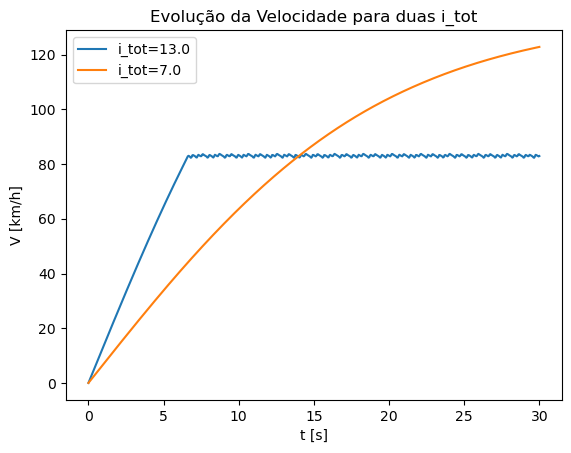

In [14]:
# Comparar duas relações totais i_tot (bem simples)
# Supõe que pmotor(omega), alpha, m, g, rho, C_D, A_f, C_R, theta, t0, tf, V0 já estejam definidos.

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

R_rod = 0.30                 # m (raio da roda)
i_tot_1 = 13.0               # relação total A
i_tot_2 = 7.0               # relação total B (altere para comparar)

def dVdt(t, y):
    V = y[0]
    V_eps = V if V > 1e-3 else 1e-3
    omega = i_tot * (V / R_rod)     # ω do motor (uma marcha fixa simples)
    P = alpha * pmotor(omega)       # potência do motor (pmotor zera acima do redline)
    F_prop = P / V_eps
    F_aer  = 0.5 * rho * C_D * A_f * V**2
    F_rol  = C_R * m * g * np.cos(theta)
    F_grav = m * g * np.sin(theta)
    return (F_prop - F_aer - F_rol - F_grav) / m

t_eval = np.linspace(t0, tf, 600)

# Simulação com i_tot_1
i_tot = i_tot_1
sol1 = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval)

# Simulação com i_tot_2
i_tot = i_tot_2
sol2 = solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval)

# Gráfico
plt.plot(sol1.t, sol1.y[0]*3.6, label=f'i_tot={i_tot_1:.1f}')
plt.plot(sol2.t, sol2.y[0]*3.6, label=f'i_tot={i_tot_2:.1f}')
plt.xlabel('t [s]')
plt.ylabel('V [km/h]')
plt.title('Evolução da Velocidade para duas i_tot')
plt.legend()
plt.show()


Observa-se que nenhuma das relações de transmissão foi boa. Uma relação muito alta proporcionou uma boa arrancada, mas a velocidade final ficou limitada um pouco acima de 80 km/h. Por outro lado, uma relação menor não limitou a velocidade, mas diminuiu muito a aceleração na arrancada. Isso acontece por duas razões: 1) a potência para baixas rotações é baixa, e 2) a potência é cortada quando o motor chega no *redline*. Para isso servem as marchas, para mudar o valor da transmissão total, tentando fazer com que o motor sempre esteja na rotação ideal (às vezes queremos máxima potência, às vezes queremos mínimo consumo), para qualquer velocidade (o que não é possível, pois temos um número limitado de marchas).

## Teoria: modelo com múltiplas marchas

Para representar o movimento real, é necessário considerar que a **relação total de transmissão** muda com a marcha selecionada. Cada marcha possui sua própria relação $i_g$, e a **relação total** é dada por:

$i_{tot} = i_{primary} \times i_{final} \times i_g$

A rotação do motor depende então da velocidade da motocicleta:

$\omega = i_{tot} \, \dfrac{V}{R_{rod}}$

Como o motor tem potência variável $P_{motor}(\omega)$, a potência disponível muda a cada marcha.  
O objetivo é escolher, para cada $V$, a **marcha que produz a maior rotação** sem ultrapassar o redline — aproveitando melhor a curva de potência. (Atenção! Usaremos esse critério neste modelo em particular, pois nem sempre desejamos a maior potência, às vezes queremos diminuir o consumo ou o ruído)

---

## Código: estratégia de simulação

O código cria uma grade de velocidades $V$ e, para cada valor:
1. Calcula a rotação $\omega$ em cada marcha.  
2. Seleciona a marcha que possui o **maior $\omega < \omega_{red}$**. Quer dizer, a marcha que apresenta a maior rotação, desde que seja menor que a rotação de corte do motor. 
3. Obtém a potência $P(V)$ correspondente do motor.

Essa potência tabulada $P(V)$ é então usada na integração da EDO:

$\dfrac{dV}{dt} = \dfrac{P(V)}{m\,V} - R_\text{perdas}$

Dessa forma, o modelo passa a trocar de marcha automaticamente conforme a velocidade aumenta, sempre mantendo o motor na faixa de rotação com maior potência disponível.


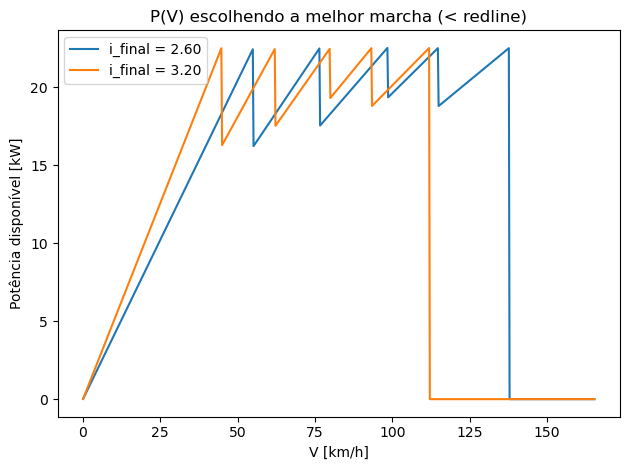

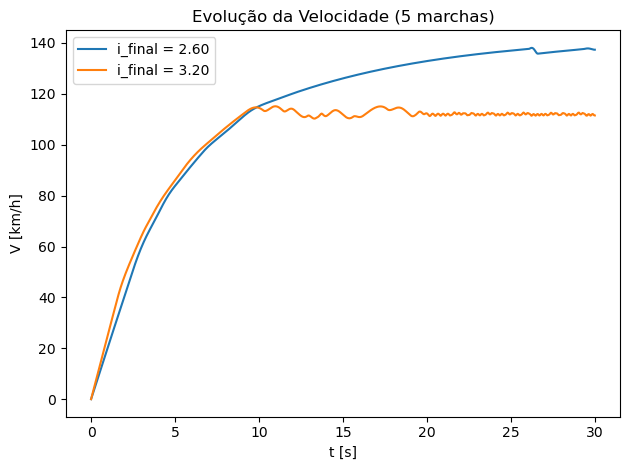

In [16]:
# Movimento com 5 marchas e DOIS casos de relação final.
# Estratégia: (1) para cada velocidade V, escolhemos a marcha que gera a MAIOR rotação < w_redline
#             (2) com P(V) tabulada, integramos dV/dt.
# Requer que pmotor(omega) e w_redline já estejam definidos na célula anterior.

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ---------- Parâmetros veículo/ambiente ----------
m, g = 250.0, 9.81                          # massa [kg] e gravidade [m/s²]
rho, C_D, A_f = 1.225, 0.7, 0.8             # ar, arrasto e área frontal
C_R, theta = 0.02, 0.0                      # rolagem e inclinação (rad)
alpha = 1.0                                  # fator multiplicativo (uso do motor)
R_rod = 0.30                                 # raio efetivo da roda [m]

# ---------- Transmissão ----------
i_primary = 3.00                             # relação primária
i_gears = np.array([2.50, 1.80, 1.40, 1.20, 1.00])  # 1ª..5ª
i_final_cases = [2.60, 3.20]                 # dois casos de relação final para comparar

# ---------- Grade de velocidade ----------
# Estima o topo (no redline em 5ª) para cada i_final e pega o maior para cobrir os dois casos
V_tops = []
for i_final in i_final_cases:
    i_totals = i_primary * i_final * i_gears           # razões totais (cada marcha)
    V_tops.append((w_redline * R_rod) / i_totals[-1])  # topo teórico em 5ª
V_grid = np.linspace(0.01, 1.2 * max(V_tops), 700)     # grade de V (m/s)

def build_P_of_V(i_final):
    """
    Para uma relação final dada, retorna:
    - Vg: grade de velocidades (m/s)
    - Pg: potência disponível (W) escolhendo, para cada V, a marcha com MAIOR ω < w_redline.
    """
    i_totals = i_primary * i_final * i_gears
    P_grid = np.zeros_like(V_grid)

    for j, V in enumerate(V_grid):
        omegas = i_totals * (V / R_rod)        # ω que cada marcha geraria nessa V
        valid = np.where(omegas < w_redline)[0]  # marchas que não estouram o redline
        if valid.size > 0:
            k = valid[np.argmax(omegas[valid])]   # escolhe a que dá MAIOR ω < redline
            P_grid[j] = alpha * pmotor(omegas[k]) # potência do motor nessa marcha
        else:
            P_grid[j] = 0.0                       # acima do topo: sem potência disponível

    return V_grid, P_grid

def integrate_with_PV(Vg, Pg, t0=0.0, tf=30.0, V0=0.01):
    """
    Integra a EDO dV/dt = (P(V)/V - perdas)/m usando interpolação de P(V).
    Retorna o objeto Solution do solve_ivp.
    """
    def dVdt(t, y):
        V = y[0]
        Veps = V if V > 1e-3 else 1e-3                 # evita divisão por zero no início
        P = np.interp(V, Vg, Pg, left=0.0, right=0.0)  # potência disponível na V atual
        F_prop = P / Veps                               # força propulsiva
        F_aer  = 0.5 * rho * C_D * A_f * V * V          # arrasto aerodinâmico
        F_rol  = C_R * m * g * np.cos(theta)            # resistência de rolagem
        F_grav = m * g * np.sin(theta)                  # componente gravitacional
        return (F_prop - F_aer - F_rol - F_grav) / m    # aceleração longitudinal

    t_eval = np.linspace(t0, tf, 700)
    return solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval)

# ---------- Calcula e integra para os dois casos ----------
results = []
for i_final in i_final_cases:
    Vg, Pg = build_P_of_V(i_final)          # mapa P(V) para esta relação final
    sol = integrate_with_PV(Vg, Pg)         # integra V(t) usando esse mapa
    results.append((i_final, Vg, Pg, sol))

# ---------- Gráfico 1: P(V) ----------
for i_final, Vg, Pg, sol in results:
    plt.plot(Vg * 3.6, Pg / 1000, label=f"i_final = {i_final:.2f}")
plt.xlabel('V [km/h]')
plt.ylabel('Potência disponível [kW]')
plt.title('P(V) escolhendo a melhor marcha (< redline)')
plt.legend()
plt.tight_layout()
plt.show()


# ---------- Gráfico 2: V(t) ----------
for i_final, Vg, Pg, sol in results:
    plt.plot(sol.t, sol.y[0] * 3.6, label=f"i_final = {i_final:.2f}")
plt.xlabel('t [s]')
plt.ylabel('V [km/h]')
plt.title('Evolução da Velocidade (5 marchas)')
plt.legend()
plt.tight_layout()
plt.show()




Os dois casos de relação final mostram o efeito direto da **transmissão** na aceleração e na velocidade final.

- Para $i_{final}=3.20$, a transmissão é **mais curta**: a moto alcança rotações elevadas mais rapidamente, resultando em **melhor arrancada**, mas atinge o **redline** ainda em velocidades relativamente baixas — o que **limita o topo** e causa o platô observado em $V(t)$.

- Para $i_{final}=2.60$, a transmissão é **mais longa**: a rotação do motor cresce mais lentamente, a **aceleração inicial é menor**, porém o motor permanece dentro da faixa útil por mais tempo, permitindo **maior velocidade final**.

Em resumo, há um **trade-off clássico**: relações curtas favorecem aceleração, enquanto relações longas aumentam a velocidade máxima. O modelo com múltiplas marchas busca equilibrar esses efeitos, mantendo o motor sempre próximo da rotação de potência ideal.

## Comparação entre motocicleta a combustão e motocicleta elétrica

A partir deste ponto, vamos estender o modelo  para comparar o desempenho de uma **motocicleta a combustão interna** (com curva de potência dependente da rotação e transmissão com marchas) com uma **motocicleta elétrica** de características equivalentes de potência.

A principal diferença conceitual está na **forma de entrega de torque e potência**:
- No motor a combustão, a potência depende fortemente da rotação e exige **múltiplas marchas** para aproveitar a faixa útil do motor.  
- No motor elétrico, o torque máximo é disponível em baixas rotações e a potência se mantém praticamente **constante** após o ponto de transição (velocidade-base), dispensando a necessidade de câmbio.

---

## Modelo do motor elétrico

O modelo considera um **motor elétrico síncrono típico** de aproximadamente **22 kW de potência de pico**.  
A curva de torque é dividida em duas regiões:

1. **Região de torque constante:**  
   Para rotações $\omega \leq \omega_{base}$, o torque é limitado pelo valor máximo ($\tau_{cte}$), resultando em uma boa aceleração em baixas velocidades.

2. **Região de potência constante:**  
   Para $\omega > \omega_{base}$, o torque decresce com $\tau = P_{lim}/\omega$, mantendo a potência mecânica praticamente constante até o limite de rotação $\omega_{max}$.

A potência mecânica entregue ao eixo é dada por:

$P_{motor} = \eta_{ev} \, \tau(\omega) \, \omega$

onde:
- $\eta_{ev}$ é a eficiência média (motor + inversor),
- $\tau(\omega)$ é o torque efetivo (limitado por corrente ou potência),
- $\omega_{base}$ e $\omega_{max}$ delimitam as zonas de operação.

Esse modelo permite comparar diretamente a moto elétrica e a moto a combustão em termos de **aceleração, potência disponível e velocidade final**, evidenciando as diferenças práticas no comportamento dinâmico.



In [19]:
# 1) Parâmetros (exemplo típico de moto elétrica ~22 kW pico)
import numpy as np

eta_ev   = 0.92          # eficiência média (motor+inversor)
tau_cont = 55.0          # N·m (contínuo)
tau_peak = 100.0         # N·m (pico 10 s)
P_cont   = 16e3          # W  (contínuo)  -> valor "elétrico" (antes da eficiência)
P_peak   = 23e3          # W  (pico 10 s) -> valor "elétrico" (antes da eficiência)

rpm_base = 3000.0        # rpm (velocidade-base nominal)
rpm_max  = 9000.0        # rpm (máxima mecânica)

w_base = rpm_base * 2*np.pi/60
w_max  = rpm_max  * 2*np.pi/60

# 2) Função P(ω) com transição contínua (sem "pico" numérico):
#    - Para ω ≤ w_base usamos τ = min(τ_cte, P_lim/ω)  → se o limite de potência for menor,
#      o "joelho" ocorre antes de w_base automaticamente.
#    - Para ω > w_base usamos τ = P_lim/ω  (potência constante).
#    - P_lim é o limite elétrico informado (P_peak ou P_cont); potência mecânica = η * τ * ω.
def pmotor_elec(omega, mode='peak'):
    w = np.asarray(omega, dtype=float)

    if mode == 'cont':
        tau_cte, P_lim = tau_cont, P_cont     # W (antes da eficiência)
    else:
        tau_cte, P_lim = tau_peak, P_peak

    w_pos   = np.maximum(w, 1e-12)            # evita divisão por zero
    tau_pow = P_lim / w_pos                   # limite de torque imposto pela potência
    tau     = np.where(w <= w_base, np.minimum(tau_cte, tau_pow), tau_pow)
    tau     = np.where(w <= w_max, tau, 0.0)  # zera acima de w_max

    # Potência mecânica entregue no eixo (após eficiência média)
    return eta_ev * tau * w                   # W

# 3) Uso básico
rpm = np.array([1000, 3000, 6000, 9000, 11000])  # inclui acima do máximo
w   = rpm * 2*np.pi/60

P_pk = pmotor_elec(w, mode='peak')
P_ct = pmotor_elec(w, mode='cont')

for r, p1, p2 in zip(rpm, P_pk, P_ct):
    print(f"{r:>5.0f} rpm  ->  Pico: {p1/1000:6.2f} kW | Cont.: {p2/1000:6.2f} kW")


 1000 rpm  ->  Pico:   9.63 kW | Cont.:   5.30 kW
 3000 rpm  ->  Pico:  21.16 kW | Cont.:  14.72 kW
 6000 rpm  ->  Pico:  21.16 kW | Cont.:  14.72 kW
 9000 rpm  ->  Pico:  21.16 kW | Cont.:  14.72 kW
11000 rpm  ->  Pico:   0.00 kW | Cont.:   0.00 kW


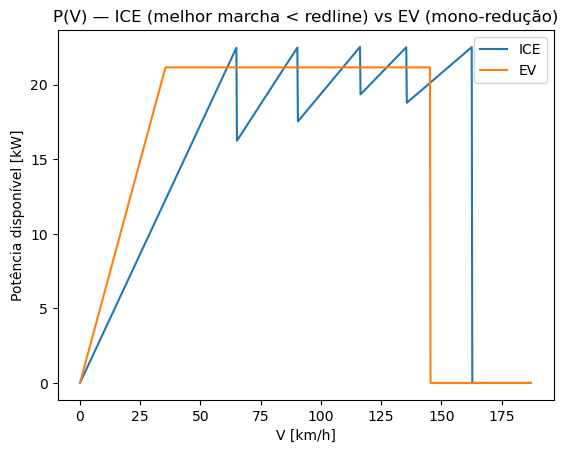

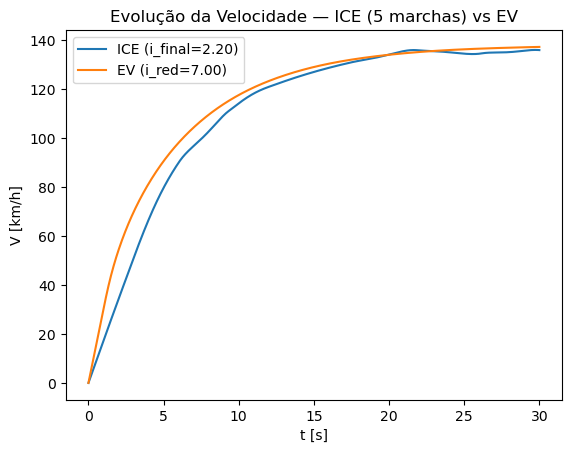

In [20]:
# ICE (5 marchas) x EV (mono-redução) — 1 ICE apenas, ICE não limitado por redline da 5ª

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# -------- Parâmetros veículo/ambiente --------
m, g = 250.0, 9.81
rho, C_D, A_f = 1.225, 0.7, 0.8
C_R, theta = 0.02, 0.0
alpha = 1.0
R_rod = 0.30  # m

# -------- Transmissão ICE (uma relação final apenas, "longa" para evitar topo por redline) --------
i_primary = 3.00
i_gears = np.array([2.50, 1.80, 1.40, 1.20, 1.00])  # 1ª..5ª
i_final_ICE = 2.20                                   # final mais longo (ajuste se quiser)
i_totals_ICE = i_primary * i_final_ICE * i_gears

# -------- Redução do elétrico --------
i_red_elec = 7.0   # total; ajusta o topo do EV (V_max ≈ w_max*R/i_red_elec)

# -------- Grade de velocidades (cobre os dois casos) --------
V_top_ICE_red5 = (w_redline * R_rod) / i_totals_ICE[-1]    # topo teórico por redline em 5ª
V_top_EV_wmax  = (w_max     * R_rod) / i_red_elec          # topo por w_max no EV
V_grid = np.linspace(0.01, 1.15*max(V_top_ICE_red5, V_top_EV_wmax), 800)  # m/s

# -------- Mapa P(V) — ICE (melhor marcha < redline) --------
def build_P_of_V_ICE(i_totals):
    P_grid = np.zeros_like(V_grid)
    for j, V in enumerate(V_grid):
        omegas = i_totals * (V / R_rod)                  # ω em cada marcha
        valid = np.where(omegas < w_redline)[0]
        if valid.size > 0:
            k = valid[np.argmax(omegas[valid])]          # maior ω abaixo do redline
            P_grid[j] = alpha * pmotor(omegas[k])
        else:
            P_grid[j] = 0.0
    return V_grid, P_grid

# -------- Mapa P(V) — EV (mono-redução) --------
def build_P_of_V_ELEC(i_red, mode='peak'):
    P_grid = np.zeros_like(V_grid)
    for j, V in enumerate(V_grid):
        omega = i_red * (V / R_rod)
        P_grid[j] = pmotor_elec(omega, mode=mode)        # zera acima de w_max
    return V_grid, P_grid

# -------- Integração genérica usando P(V) tabulado --------
def integrate_with_PV(Vg, Pg, t0=0.0, tf=30.0, V0=0.01):
    def dVdt(t, y):
        V = y[0]
        Veps = V if V > 1e-3 else 1e-3
        P = np.interp(V, Vg, Pg, left=0.0, right=0.0)
        F_prop = P / Veps
        F_aer  = 0.5 * rho * C_D * A_f * V * V
        F_rol  = C_R * m * g * np.cos(theta)
        F_grav = m * g * np.sin(theta)
        return (F_prop - F_aer - F_rol - F_grav) / m
    t_eval = np.linspace(t0, tf, 700)
    return solve_ivp(dVdt, (t0, tf), [V0], t_eval=t_eval)

# -------- Monta mapas e integra --------
Vg_ice, Pg_ice = build_P_of_V_ICE(i_totals_ICE)
sol_ice = integrate_with_PV(Vg_ice, Pg_ice)

Vg_ev, Pg_ev = build_P_of_V_ELEC(i_red_elec, mode='peak')  # use 'cont' p/ contínuo
sol_ev = integrate_with_PV(Vg_ev, Pg_ev)

# -------- Gráfico 1: P(V) --------
plt.plot(Vg_ice*3.6, Pg_ice/1000, label="ICE")
plt.plot(Vg_ev*3.6,  Pg_ev/1000,  label="EV")
plt.xlabel('V [km/h]')
plt.ylabel('Potência disponível [kW]')
plt.title('P(V) — ICE (melhor marcha < redline) vs EV (mono-redução)')
plt.legend(); plt.show()


# -------- Gráfico 2: V(t) --------
plt.plot(sol_ice.t, sol_ice.y[0]*3.6, label=f"ICE (i_final={i_final_ICE:.2f})")
plt.plot(sol_ev.t,  sol_ev.y[0]*3.6,  label=f"EV (i_red={i_red_elec:.2f})")
plt.xlabel('t [s]')
plt.ylabel('V [km/h]')
plt.title('Evolução da Velocidade — ICE (5 marchas) vs EV')
plt.legend(); plt.show()



## Comparação entre Moto a Combustão (ICE) e Moto Elétrica (EV)

Os gráficos mostram a comparação entre o desempenho de uma motocicleta a combustão (ICE) com **cinco marchas** e uma motocicleta elétrica (EV) com **transmissão única**.

Na figura superior, observa-se a curva de **potência disponível em função da velocidade**.  A moto elétrica mantém potência praticamente constante em ampla faixa de rotações, enquanto o motor a combustão apresenta oscilações associadas às trocas de marcha — cada uma aproveitando a faixa útil do motor até o limite de rotação (*redline*).  
Apesar dessas diferenças, ambas atingem potências similares no regime máximo.

### Interpretação da aceleração

A figura inferior mostra a **evolução da velocidade com o tempo**. Embora o motor elétrico forneça **torque máximo já em baixas rotações**, isso **não implica** uma aceleração muito maior.  O que efetivamente determina a aceleração é a **potência mecânica** (produto torque × rotação), e essa cresce gradualmente à medida que a velocidade aumenta. Assim:

- Em **baixas velocidades**, o torque elevado do motor elétrico gera resposta imediata, mas a potência ainda é limitada pela rotação baixa.  
- Em **altas velocidades**, o regime de potência constante faz a aceleração reduzir, de modo análogo ao comportamento da moto a combustão.  

O resultado final mostra que, para potências equivalentes, o desempenho global das duas motos é **muito próximo**, com diferenças mais perceptíveis apenas na suavidade da curva e na ausência de trocas de marcha no caso elétrico. 


### Comparação realista entre motos convencionais *vs.* elétricas

 A comparação entre motocicletas elétricas e convencionais é bem mais ampla, devendo levar em conta também diferença no peso das duas motocicletas, autonomia (quantos quilometros são rodados com uma carga/tanque), tempo de recarga/reabastecimento, gastos com manutenção (incluindo a troca das baterias), som do motor, tradição, estilo, preço, etc. 


## Cenário com ações do piloto

Para terminar, vamos introduzir o papel do piloto (até aqui, ele só acelera o tempo todo, *i.e.*, $\alpha=1$ e $\beta=0$), e sempre escolhe as mesmas marchas para cada velocidade (a marcha que maximiza a rotação)

Para este estudo, por simplicidade do código, vamos voltar ao código inicial com potência máxima constante. A moto agora começa o experimento em $V(0)=120\ \text{km/h}$, e o piloto segue as seguintes fases:

1. **Banguela** ($0\le t<3$ s): $\,\alpha=0,\;\beta=0$ (sem propulsão nem freio).
2. **Frenagem 80%** ($3\le t<5$ s): $\,\alpha=0,\;\beta=0{,}8$.
3. **Reaceleração e cruzeiro** ($t\ge5$ s): $\,\beta=0$ e aceleramos até $V_{ref}=90\ \text{km/h}$.
   - Enquanto $V<V_{ref}$: usamos um controle proporcional simples $\,\alpha=\mathrm{clip}\{k_p\,(V_{ref}-V),\,0,1\}$.
   - Ao atingir o alvo, mantemos cruzeiro com $\,\alpha=\alpha_{eq}(V_{ref})$, que equilibra as perdas e faz $\mathrm{d}V/\mathrm{d}t=0$:
     $$
     \alpha_{eq}(V)=\frac{m\,V}{P_{max}}
     \left(
       \frac{\rho\,C_D\,A_f}{m}\,\frac{V^2}{2}
       + C_R g\cos\theta
       + g\sin\theta
     \right)
     $$
     (cruzeiro sem freio: $\beta=0$).  
Usaremos $V_\varepsilon=\max(V,10^{-3})$ dentro do termo $P/(mV)$ para evitar singularidade perto de $V=0$.

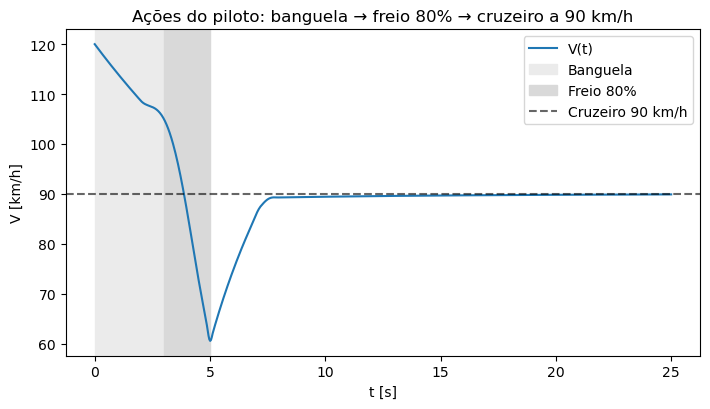

In [36]:
# --- Cenário do piloto: 120 km/h -> banguela 3 s -> freio 80% por 2 s -> reacelera até 90 km/h e mantém ---
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Pressupõe que os parâmetros já existem na célula anterior:
# m, g, rho, C_D, A_f, C_R, theta, mu, P_max

# Alvos e tempos
V_ref_kmh = 90.0
V_ref     = V_ref_kmh / 3.6
V0        = 120.0 / 3.6
t0, tf    = 0.0, 25.0

# Aceleração equivalente para manter cruzeiro (beta=0) e alpha correspondente
def alpha_eq_for(V):
    a_res = (rho*C_D*A_f/m)*(V**2/2.0) + C_R*g*np.cos(theta) + g*np.sin(theta)
    return float(np.clip((m*V*a_res)/P_max, 0.0, 1.0))   # limita o valor entre 0 e 1

alpha_cruise = alpha_eq_for(V_ref)

# Controle simples do piloto
k_p = 1     # ganho proporcional para reaceleração
tol = 0.5      # tolerância (m/s) para considerar que atingiu o alvo

def controls(t, V):
    # retorna (alpha, beta)
    if t < 3.0:
        return 0.0, 0.0                      # banguela
    elif t < 5.0:
        return 0.0, 0.8                      # freio 80%
    else:
        if V < V_ref - tol:
            alpha = np.clip(k_p*(V_ref - V), 0.0, 1.0)
            return alpha, 0.0                # reacelera
        else:
            return alpha_cruise, 0.0         # mantém cruzeiro

# Dinâmica longitudinal com controle do piloto
def dVdt_piloto(t, y):
    V = float(y[0])
    Veps = V if V > 1e-3 else 1e-3
    alpha, beta = controls(t, V)

    a_prop = alpha * P_max / (m * Veps)
    a_fren = beta * mu * g * np.cos(theta)
    a_aer  = (rho*C_D*A_f/m) * (V**2 / 2.0)
    a_roll = C_R * g * np.cos(theta)
    a_grad = g * np.sin(theta)

    return a_prop - a_fren - a_aer - a_roll - a_grad

# Integração
t_eval = np.linspace(t0, tf, 700)
sol = solve_ivp(dVdt_piloto, (t0, tf), [V0], t_eval=t_eval)

# Plot
plt.figure(figsize=(7.2,4.2))
plt.plot(sol.t, sol.y[0]*3.6, label='V(t)')
plt.axvspan(0, 3, color='0.92', label='Banguela')
plt.axvspan(3, 5, color='0.85', label='Freio 80%')
plt.axhline(V_ref_kmh, color='k', linestyle='--', alpha=0.6, label='Cruzeiro 90 km/h')
plt.xlabel('t [s]'); plt.ylabel('V [km/h]')
plt.title('Ações do piloto: banguela → freio 80% → cruzeiro a 90 km/h')
plt.legend()
plt.tight_layout()
plt.show()


## Conclusão — o que levar daqui

- **Da física à EDO.** Saímos de $F=ma$ para uma EDO de $V(t)$ em que:
  - a **propulsão** aparece como $P/V$,
  - o **arrasto** cresce com $V^2$,
  - a **rolagem** é quase constante,
  - a **rampa** soma/subtrai $g\sin\theta$.   
  
  No fim, a aceleração é o **saldo** dessas parcelas dividido por $m$.

- **Quem manda na aceleração? A potência.** Como $P=\tau\,\omega$ e $a \approx P/mV$, muito torque com rotação baixa **não** vira aceleração gigantesca: é a **potência** disponível que conta.

- **Transmissão como ponte $V\leftrightarrow\omega$.** A relação $\,\omega=i_{tot}\,V/R_{rod}\,$ explica por que:
  - relação **curta** (maior $i_{tot}$) → **melhor arrancada**, mas **topo menor** (bate no *redline* cedo);
  - relação **longa** → **arranca menos**, mas **corre mais** no final.
  As **marchas** servem para manter o motor na faixa “boa” de rotação.

- **ICE vs EV (ideia central).**
  - **ICE**: potência depende de $\omega$ e as trocas criam “degraus” em $P(V)$ e pequenas quebras em $V(t)$.
  - **EV**: **torque alto** no começo e **potência quase constante** depois; curva mais **suave** sem trocas.
  - Com **potências equivalentes**, o resultado em $V(t)$ é **parecido**; muda a “entrega”.

- **Solução numérica.** Integramos com `solve_ivp` (RK45, passo adaptativo) usando $P(V)$: primeiro construímos o mapa de potência (escolha de marcha no ICE; curva do EV), depois resolvemos $\mathrm{d}V/\mathrm{d}t=\big(P(V)/V-\text{perdas}\big)/m$ com um $V_\varepsilon$ pequeno para evitar $P/V$ infinito no início.


### Estudo do piloto (banguela → freio 80% → cruzeiro a 90 km/h)

- **Cenário:** começamos com $V(0)=120$ km/h.  
  1) **Banguela** ($0\le t<3$ s): $\alpha=0$, $\beta=0$ → a moto perde velocidade só pelas **perdas** (arrasto/rolagem).  
  2) **Freio 80%** ($3\le t<5$ s): $\alpha=0$, $\beta=0{,}8$ → desaceleração forte e controlada.  
  3) **Reaceleração até cruzeiro** ($t\ge5$ s): $\beta=0$ e usamos um controle simples $\alpha=\mathrm{clip}\{k_p\,(V_{ref}-V),0,1\}$ até $V_{ref}=90$ km/h; depois fixamos $\alpha=\alpha_{eq}(V_{ref})$ para que **propulsão = perdas** e $V$ se mantenha.

**Ideia chave:** a ação do piloto ($\alpha,\beta$) só “abre/fecha a torneira” da potência/frenagem; quem decide o formato de $V(t)$ continua sendo o **balanço de potência vs perdas** junto com a **transmissão**.


## Trabalhos futuros

A ideia aqui é **brincar com os parâmetros** do modelo para enxergar fenômenos que fazem sentido no dia a dia, e só depois ir avançando.

---

### 1) Experimentos “rápidos”

- **Massa $m$**: aumente/diminua $m$ e veja a **arrancada** e a **frenagem** mudarem.  
  Dica: teste $m\in[180,320]$ kg.

- **Aerodinâmica $C_D$ e $A_f$**: altere a postura do piloto (mais ereto → maior $A_f$).  
  Lembre: a força de arrasto cresce como $\tfrac12\,\rho\,C_D\,A_f\,V^2$.  
  Pergunta: qual parâmetro pesa mais no **topo de velocidade**?

- **Rolagem $C_R$ (piso/pneu)**: suba $C_R$ para simular asfalto ruim/pressão baixa.  
  Efeito forte nas **baixas velocidades** (no topo, o arrasto domina).

- **Inclinação $\theta$**: coloque subida/descida (pequenos graus já mudam bastante via $g\sin\theta$).  
  Compare **tempo 0–60 km/h** em plano vs rampa leve.

- **Densidade do ar $\rho$** (clima/altitude): Recife vs cidade alta/fria.  
  Menor $\rho$ → **menos arrasto** → maior topo (mas muda também enchimento do motor).

- **Vento**: use velocidade relativa $V_{rel}=V - V_{vento}$ no termo de arrasto.  
  Veja o impacto de **10 km/h de vento contrário** no tempo 0–100.

- **Raio da roda $R_{rod}$**: altera o vínculo $\omega = i_{tot}\,V/R_{rod}$.  
  Pneus mais altos/baixos mudam a rotação para a mesma $V$.

- **Perfil do piloto ($\alpha(t),\beta(t)$)**: degraus, rampas ou “pulsos” de freio.  
  Refaça o cenário **banguela → freio 80% → cruzeiro** com outros alvos.

---

### 2) Transmissão (intuição prática)

- **Relação final $i_{final}$ e marchas $i_g$**: troque entre curto/longa e compare:
  - **Arrancada** (quem chega primeiro aos 60–100 km/h);
  - **Velocidade final** (bate no *redline* antes?).

- **Regras simples de troca**: trocar a $\omega=\omega_{shift}$ com pequena histerese (evita “pula-pula”).

---

### 3) Motor elétrico (EV) — variações simples

- **Pico vs contínuo**: use modos `peak/cont` (torque e potência limitados).  
- **Massa da bateria**: aumente $m$ para ver a resposta mudar.  
- **Regeneração**: permita $\beta<0$ limitado (recupera um pouco de energia nas desacelerações).

---

### 4) Consumo e autonomia (sem complicar)

- **ICE — km/L**: estime $\dot m_{comb} \approx \dfrac{P/\eta_m}{PC_{comb}}$ e integre no tempo → **km/L**.  
- **EV — Wh/km**: $P_{el}\approx P/\eta_{ev}$ → **Wh/km** e autonomia $\approx \dfrac{E_{batt}}{\text{Wh/km}}$.

---

### 5) Passos “intermediários” (se quiser avançar)

- **Frações de força**: plote, ao longo do tempo, quanto vem de **propulsão**, **arrasto**, **rolagem** e **rampa**.  
- **Inércia rotacional** (roda/virabrequim): modelar como massa equivalente (efeito mais visível em arrancadas).  
- **Eficiências variáveis**: $\eta_m(\omega)$ e $\eta_{vol}(\omega)$ (mapas simples, sem entrar em detalhes finos).     s

---

### 6) Perguntas-guia (para explorar “por que acontece?”)

- O que aumenta mais a **velocidade final**: reduzir $C_D$ ou reduzir $A_f$?  
- Quanto **vento contrário de 10 km/h** atrasa o 0–100?  
- Qual $i_{final}$ dá o melhor 0–60 km/h **sem** derrubar demais o **topo**?

> Meta: usar o modelo como **laboratório de ideias**. Primeiro mova **um parâmetro por vez** e observe o efeito físico; depois combine alterações e explique o “porquê” usando os termos da EDO.
